# Dive Prediction - Results

*Predicting Seabird Diving Behaviour from GPS data*

This notebook presents results of different algorithms for dive prediction based on a dataset of **74 foraging trips of seabirds** (*Sula Variegata*) with both GPS and Time Depth Recorder (TDR) tracking data. Data has been collected on **Ilha Pescadores, Peru** between 2009 and 2013.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def roc(data):
    # globally
    TP = []
    FP = []

    for tt in data.prediction.sort_values().unique():
        all_estim = 1* (data.prediction > tt)
        true_positive = np.mean(all_estim[data.dive == 1])
        true_negative = 1-np.mean(all_estim[data.dive == 0])
        TP.append(true_positive)
        FP.append(1-true_negative)
        
    return (np.array(FP), np.array(TP))

In [3]:
def outsampling(data, resolution):

    data_output = pd.DataFrame()
    for i in data.trip.unique():
        t = data[data.trip == i].copy()

        idx = [i%resolution == 0 for i in range(len(t))]

        traj = t.loc[idx, ('trip', 'datetime', 'lon', 'lat')]

        traj['dive'] = [np.max(t.dive[i:i+resolution]) for i in range(len(t)) if i%resolution==0]
        traj['prediction'] = [np.max(t.prediction[i:i+resolution]) for i in range(len(t)) if i%resolution==0]

        data_output = data_output.append(traj, ignore_index=True)

    return data_output

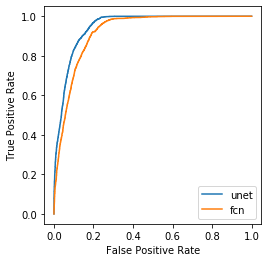

In [4]:
unet = pd.read_csv('./results/LB_unet_all_20_20_5s.csv')
fcn = pd.read_csv('./results/LB_fcn_lonlatcov_11_1_5s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# UNET
d = roc(unet)
plt.plot(d[0], d[1], label = 'unet')

# FCN
d = roc(fcn)
plt.plot(d[0], d[1], label = 'fcn')


plt.legend()

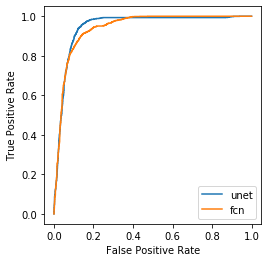

In [5]:
unet = pd.read_csv('./results/LB_unet_all_20_20_15s.csv')
fcn = pd.read_csv('./results/LB_fcn_lonlatcov_11_1_15s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# UNET
d = roc(unet)
plt.plot(d[0], d[1], label = 'unet')

# FCN
d = roc(fcn)
plt.plot(d[0], d[1], label = 'fcn')


plt.legend()

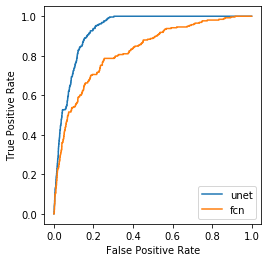

In [6]:
unet = pd.read_csv('./results/SV_unet_all_20_20_5s.csv')
fcn = pd.read_csv('./results/SV_fcn_lonlatcov_11_1_5s.csv')


fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# UNET
d = roc(unet)
plt.plot(d[0], d[1], label = 'unet')

# FCN
d = roc(fcn)
plt.plot(d[0], d[1], label = 'fcn')


plt.legend()

# roc results

## 1s

In [12]:
deep_distance = pd.read_csv('./results/deep_distance_11_1_1s.csv')

hmm = pd.read_csv('./results/hmm_prediction_1s.csv')
ftp = pd.read_csv('./results/ftp_prediction_1s.csv')

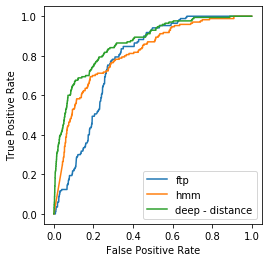

In [13]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')

# Deep - distance
d = roc(deep_distance)
plt.plot(d[0], d[1], label = 'deep - distance')


plt.legend()

## 5s

In [14]:
fcn_lonlat = pd.read_csv('./results/fcn_lonlat_11_1_5s.csv')
fcn_lonlatcov = pd.read_csv('./results/fcn_lonlatcov_11_1_5s.csv')
deep_all = pd.read_csv('./results/deep_all_11_1_5s.csv')
deep_distance = pd.read_csv('./results/deep_distance_11_1_5s.csv')
unet_all = pd.read_csv('./results/unet_all_20_20_5s.csv')

hmm = pd.read_csv('./results/hmm_prediction_5s.csv')
ftp = pd.read_csv('./results/ftp_prediction_5s.csv')

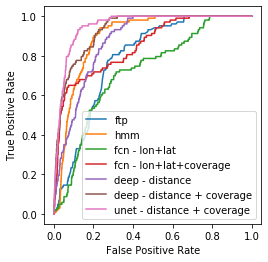

In [15]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')

# FCN - lon lat
d = roc(fcn_lonlat)
plt.plot(d[0], d[1], label = 'fcn - lon+lat')

# FCN - lon lat coverage
d = roc(fcn_lonlatcov)
plt.plot(d[0], d[1], label = 'fcn - lon+lat+coverage')

# Deep - distance
d = roc(deep_distance)
plt.plot(d[0], d[1], label = 'deep - distance')

# Deep - distance coverage
d = roc(deep_all)
plt.plot(d[0], d[1], label = 'deep - distance + coverage')

# Unet - distance coverage
d = roc(unet_all)
plt.plot(d[0], d[1], label = 'unet - distance + coverage')


plt.legend()

## 15s

In [4]:
fcn_lonlat = pd.read_csv('./results/fcn_lonlat_11_1_15s.csv')
fcn_lonlatcov = pd.read_csv('./results/fcn_lonlatcov_11_1_15s.csv')
deep_all = pd.read_csv('./results/deep_all_11_1_15s.csv')
deep_distance = pd.read_csv('./results/deep_distance_11_1_15s.csv')
unet_all = pd.read_csv('./results/unet_all_20_20_15s.csv')


hmm = pd.read_csv('./results/hmm_prediction_15s.csv')
ftp = pd.read_csv('./results/ftp_prediction_15s.csv')

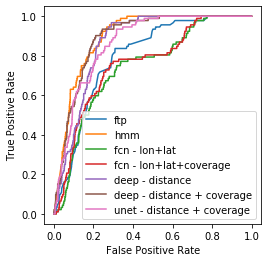

In [5]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# FTP
d = roc(ftp)
plt.plot(d[0], d[1], label = 'ftp')

# HMM
d = roc(hmm)
plt.plot(d[0], d[1], label = 'hmm')

# FCN - lon lat
d = roc(fcn_lonlat)
plt.plot(d[0], d[1], label = 'fcn - lon+lat')

# FCN - lon lat coverage
d = roc(fcn_lonlatcov)
plt.plot(d[0], d[1], label = 'fcn - lon+lat+coverage')

# Deep - distance
d = roc(deep_distance)
plt.plot(d[0], d[1], label = 'deep - distance')

# Deep - distance coverage
d = roc(deep_all)
plt.plot(d[0], d[1], label = 'deep - distance + coverage')

# Unet - distance coverage
d = roc(unet_all)
plt.plot(d[0], d[1], label = 'unet - distance + coverage')


plt.legend()